In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
data = pd.read_csv('kaggle/input/artemis-full/artemis.csv')
data

,Unnamed: 0,art_style,painting,emotion,utterance,repetition,path
0,0,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,something else,"She seems very happy in the picture, and you w...",10,/kaggle/input/wikiart/Post_Impressionism/vince...
1,1,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,sadness,This woman has really knotty hands which makes...,10,/kaggle/input/wikiart/Post_Impressionism/vince...
2,2,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,something else,"When looking at this woman, I am filled with c...",10,/kaggle/input/wikiart/Post_Impressionism/vince...
3,3,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,contentment,"A woman looking at ease, peaceful, and satisfi...",10,/kaggle/input/wikiart/Post_Impressionism/vince...
4,4,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,awe,She looks like a lady from that past that migh...,10,/kaggle/input/wikiart/Post_Impressionism/vince...
...,...,...,...,...,...,...,...
450550,454679,Cubism,gino-severini_a-dancer-1,awe,the collection and collage of different colors...,48,/kaggle/input/wikiart/Cubism/gino-severini_a-d...
450551,454680,Romanticism,ivan-aivazovsky_sea-at-night-1861,awe,The peaceful reflections of the moonlight on t...,8,/kaggle/input/wikiart/Romanticism/ivan-aivazov...
450552,454681,Romanticism,ivan-aivazovsky_sea-at-night-1861,excitement,I can imagine the sailors resting this peacefu...,8,/kaggle/input/wikiart/Romanticism/ivan-aivazov...
450553,454682,Romanticism,ivan-aivazovsky_sea-at-night-1861,contentment,The steep mountains and the moonlight provide ...,8,/kaggle/input/wikiart/Romanticism/ivan-aivazov...


In [3]:
#ne odgovara mi putanja
correct_path_prefix = 'kaggle/input/wikiart/'
def update_path(path):
    return path.replace('/kaggle/input/wikiart/', correct_path_prefix)

data['path'] = data['path'].apply(update_path)

In [4]:
# Uzimamo prvih par redova iz DataFrame-a
sample_paths = data['path'].head(10)
#Iteriramo kroz putanje i prikazujemo slike
#for path in sample_paths:
#    try:
#        img = mpimg.imread(path)
#        imgplot = plt.imshow(img)
#        plt.axis('off')  # Uklanja ose oko slike
#        plt.show()
#    except FileNotFoundError:
#        print(f"Slika nije pronađena na putanji: {path}")

In [5]:
#ISTRAZIVANJE PODATALA

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450555 entries, 0 to 450554
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  450555 non-null  int64 
 1   art_style   450555 non-null  object
 2   painting    450555 non-null  object
 3   emotion     450555 non-null  object
 4   utterance   450555 non-null  object
 5   repetition  450555 non-null  int64 
 6   path        450555 non-null  object
dtypes: int64(2), object(5)
memory usage: 24.1+ MB


In [7]:
#emocije su najzastupljenije.
data['emotion'].value_counts()

emotion
contentment       124930
awe                72234
something else     52612
sadness            48617
amusement          44913
fear               41197
excitement         37198
disgust            22246
anger               6608
Name: count, dtype: int64

In [8]:
# Ovde zakljucujemo značajna neravnoteža u distribuciji emocija, gde su emocije poput Contentment i 
#Awe mnogo češće zastupljene nego emocije poput Disgust i Anger.

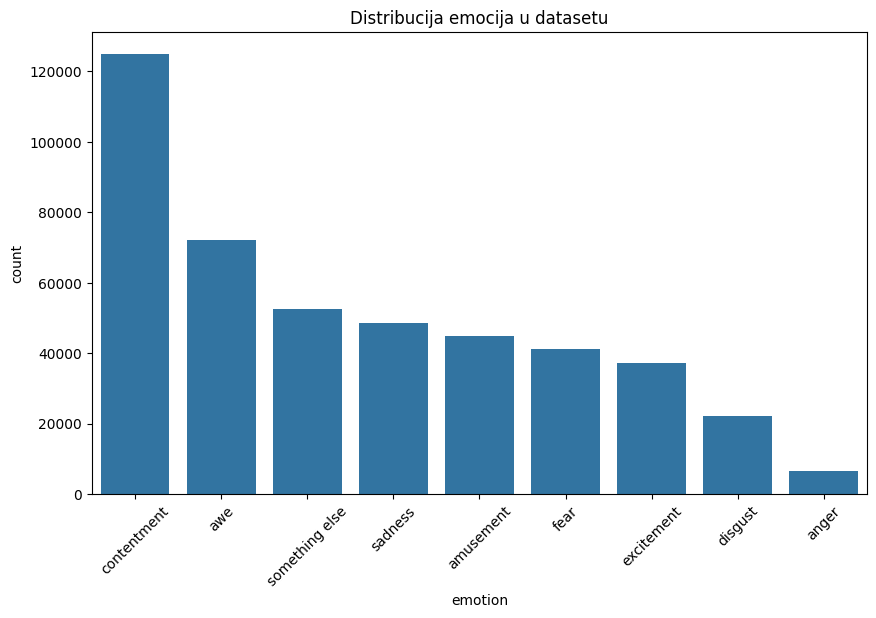

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(x='emotion', data=data, order=data['emotion'].value_counts().index)
plt.title('Distribucija emocija u datasetu')
plt.xticks(rotation=45)
plt.show()